# 线性回归

在神经网络与机器学习的研究领域中，线性回归作为一类基础而核心的数学工具，为理解复杂模型的构建原理提供了重要的切入点。

其本质是通过线性映射建立输入变量与目标变量之间的显式关联，旨在以最小化预测误差为目标优化模型参数。

在神经网络的框架下，线性回归可视为单层神经网络的简化形式，其权重矩阵与偏置向量直接对应网络的可学习参数。

这一模型虽结构简单，却揭示了数据驱动建模的核心范式：通过梯度优化迭代逼近全局最优解。

值得注意的是，现代深度学习中许多复杂的非线性模型均以线性变换为基础构建模块，辅以非线性激活函数实现高阶特征提取。

因此，深入理解线性回归的数学性质与优化机制，不仅为后续探索非线性模型奠定基础，亦有助于揭示机器学习中参数学习与泛化能力的本质联系。

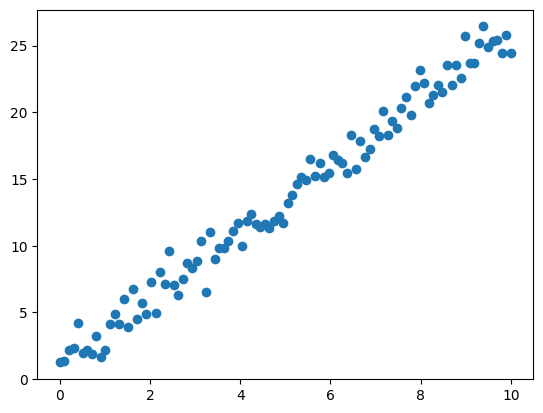

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 自变量
x = np.linspace(0, 10, 100)
# 真实斜率
a_true = 2.5
# 真实截距
b_true = 1.0
# 因变量，加入噪声
y = a_true * x + b_true + np.random.randn(100)

plt.figure()
plt.scatter(x, y, label="Data Points")
plt.show()

# 最小二乘法及其局限性

我们在高中时已经接触过对这种数据进行线性拟合，当时使用的方法是最小二乘法。

数学原理

假设存在一组观测数据点 

(x1,y1),(x2,y2),…,(xn,yn) 目标是找到一条直线 y=a*x+b 使其尽可能贴合这些数据点。

最小二乘法通过以下步骤求解参数 a（斜率）和 b（截距）

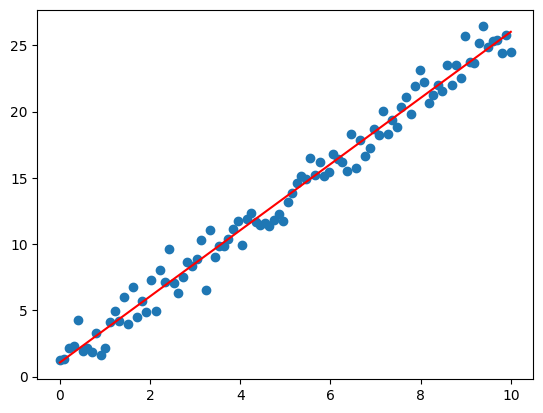

In [2]:
def linear_fit(x: np.ndarray, y: np.ndarray):
    assert len(x) == len(y)
    sigma_x = x.sum()
    sigma_y = y.sum()
    sigma_xx = (x * x).sum()
    sigma_xy = (x * y).sum()
    n = len(x)
    a = (n * sigma_xy - sigma_x * sigma_y) / (n * sigma_xx - sigma_x * sigma_x)
    b = (sigma_y - a * sigma_x) / n
    return a, b


a_hat, b_hat = linear_fit(x, y)

plt.figure()
plt.scatter(x, y, label="Data Points")
plt.plot(x, a_hat * x + b_hat, color="red", label=f"y = {a_hat}*x+{b_hat}")
plt.show()

1. 非线性建模的固有缺陷
   最小二乘法本质是线性模型的最优解搜索工具，其闭合解依赖于线性系统的可解析性。
   而神经网络的强大之处在于通过非线性激活函数（如ReLU、Sigmoid）和分层结构实现复杂的非线性映射。
   这种非线性特性使得模型的损失函数（如均方误差）不再是参数的凸函数，导致无法直接通过最小二乘法的闭合解公式求解全局最优。
2. 高维参数空间的计算不可行性
   最小二乘法的闭合解需要计算矩阵的逆。对于神经网络而言，参数量常达数百万甚至数十亿，甚至三千七百亿（deepseek-r1 371B），对应的矩阵维度极高。
   矩阵求逆的运算复杂度为 O(n^3)，这在时间和内存上均不可行。

在神经网络领域会采用梯度下降法的优化算法
